## Telecom Users Dataset Analysis

The dataset is from Kaggle and the link to the data set can be found [here.](https://www.kaggle.com/radmirzosimov/telecom-users-dataset?select=telecom_users.csv) The data set contains information about almost six thousands users, their payment methods, payment amounts, services they use ect.

It important for the comapny to keep their cusotmers and to reduce the customer turn over which will increase the revenu of the company. We willanalyse the data set and answer the following questions.

Column data is as below.
* customerID - customer id
* gender - client gender (male / female)
* SeniorCitizen - is the client retired (1, 0)
* Partner - is the client married (Yes, No)
* tenure - how many months a person has been a client of the company
* PhoneService - is the telephone service connected (Yes, No)
* MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
* InternetService - client's Internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - is the online security service connected (Yes, No, No internet service)
* OnlineBackup - is the online backup service activated (Yes, No, No internet service)
* DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
* TechSupport - is the technical support service connected (Yes, No, No internet service)
* StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
* StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
* Contract - type of customer contract (Month-to-month, One year, Two year)
* PaperlessBilling - whether the client uses paperless billing (Yes, No)
* PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - current monthly payment
* TotalCharges - the total amount that the client paid for the services for the entire time
* Churn - whether there was a churn (Yes or No)

1. Description of the data and data analysis
2. Building the models for predicting the outflow.

Below setps will be followed,
1. Data cleaning
2. Data exploration
3. Feature Engineering
4. Feature Selection
5. Model training
6. Model statisfaction

In [2]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [3]:
telecom = pd.read_csv('telecom_users.csv')

In [4]:
#find the rows and columns
telecom.shape

(5986, 22)

In [5]:
telecom.head(3)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes


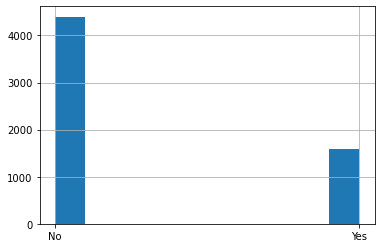

In [6]:
#find out tht churned customers
telecom.Churn.hist()

### 1. Data Cleaning

In [7]:
telecom.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#Churn column will be changed to 1 and 0
telecom['Churn'] = telecom['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [9]:
telecom['Churn'].value_counts()

0    4399
1    1587
Name: Churn, dtype: int64

In [10]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


We will drop the columns 'Unnamed' and 'customerID' since it won't be useful for the analysis

In [11]:
telecom.drop(['Unnamed: 0','customerID'], axis = 1, inplace = True)

### 2. Data Exploration

In [12]:
#to find the unique values
telecom.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5611
Churn                  2
dtype: int64

In [13]:
telecom.describe(include = [np.number])

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,0.265119
std,0.367909,24.516391,30.114702,0.441433
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.650000,0.000000
50%,0.000000,29.000000,70.400000,0.000000
75%,0.000000,56.000000,89.900000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [14]:
telecom.describe(include = [np.object])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10


In [15]:
contract = telecom['Contract'].value_counts()
contract

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64

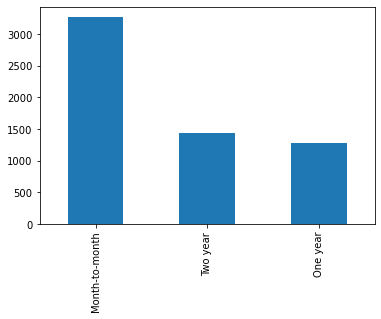

In [16]:
telecom['Contract'].value_counts().plot(kind = 'bar')

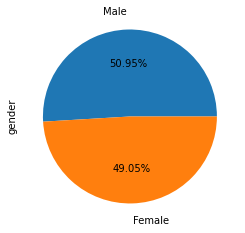

In [17]:
gender = telecom['gender']
plot = gender.value_counts().plot.pie(autopct = '%1.2f%%', labeldistance=1.2)
plt.show()

In [18]:
payment_method = telecom['PaymentMethod'].value_counts()
payment_method

Electronic check             2006
Mailed check                 1369
Bank transfer (automatic)    1308
Credit card (automatic)      1303
Name: PaymentMethod, dtype: int64

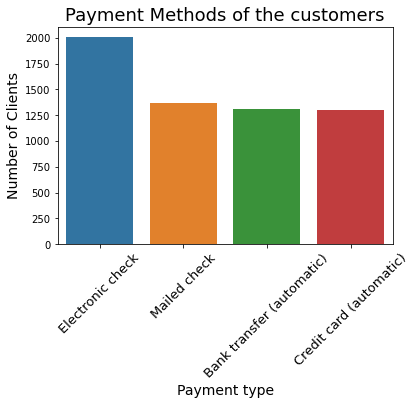

In [19]:
sns.barplot(x = payment_method.index, y = payment_method.values)
plt.title('Payment Methods of the customers', fontsize = 18)
plt.xlabel('Payment type', fontsize = 14)
plt.ylabel('Number of Clients', fontsize = 14)
plt.xticks(rotation = 45, fontsize = 13)
plt.show()

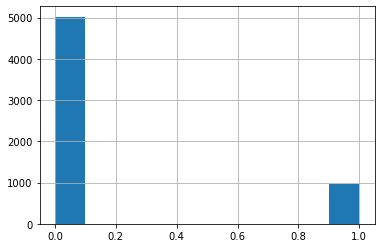

In [20]:
telecom['SeniorCitizen'].hist()

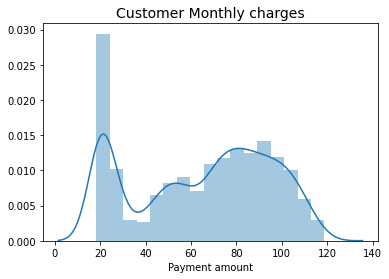

In [62]:
monthly_charges = telecom['MonthlyCharges']
sns.distplot(monthly_charges)
plt.title('Customer Monthly charges', fontsize = 14)
plt.xlabel('Payment amount')
plt.show()

In [22]:
tenure_grps = telecom['tenure'].value_counts(bins = 6)
tenure_grps

(-0.073, 12.0]    1848
(60.0, 72.0]      1195
(12.0, 24.0]       859
(24.0, 36.0]       722
(48.0, 60.0]       710
(36.0, 48.0]       652
Name: tenure, dtype: int64

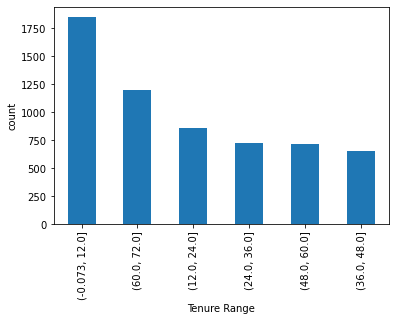

In [23]:
tenure_grps.plot(kind = 'bar')
plt.xlabel('Tenure Range')
plt.ylabel('count')
plt.show()

From the above analysis we can conclude the below.
* Total male count is only slightly higher than the female count.
* There is around 1000 counts senior citizens
* The tenure is 0- 12 has the high number of people.

In [24]:
numeric_cols = telecom.select_dtypes(include = ['int64','float64'])
numeric_cols

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,72,24.10,0
1,0,44,88.15,0
2,1,38,74.95,1
3,0,4,55.90,0
4,0,2,53.45,0
...,...,...,...,...
5981,0,1,95.00,1
5982,0,23,91.10,0
5983,0,12,21.15,0
5984,1,12,99.45,1


In [25]:
correlation = numeric_cols.corr()
correlation

,SeniorCitizen,tenure,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.005468,0.219387,0.150097
tenure,0.005468,1.000000,0.256983,-0.348469
MonthlyCharges,0.219387,0.256983,1.000000,0.186753
Churn,0.150097,-0.348469,0.186753,1.000000


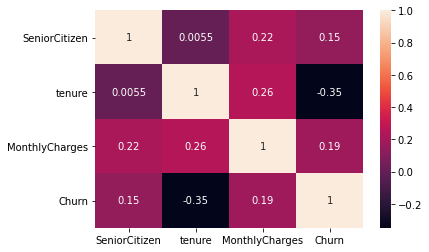

In [26]:
sns.heatmap(correlation, annot = True)

From the current numeric colums there seems to be no high correlation with the 'Churn' column.

### 3. Feature Engineering

We will remove any columns that leak information or not useful when creating the machine learning model. We will remove the columns 'Partner' and 'Dependents'

In [27]:
telecom.drop(['Partner', 'Dependents'], axis = 1, inplace = True)

In [28]:
#create a new dataframe as df
df = telecom.copy()

We will change the 'Yes' as 1 and 'No' as 0 for the string columns

In [29]:
phone_ser = {'PhoneService':{'Yes':1, 'No':0}}
df = df.replace(phone_ser)

In [30]:
paperless_repl = {'PaperlessBilling':{'Yes':1, 'No':0}}
df = df.replace(paperless_repl)

In [31]:
dummies = pd.get_dummies(df[['gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
'Contract','PaymentMethod']])
dummies

,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,1,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,1,0,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0
3,0,1,1,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,0,1,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,1,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
5982,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
5983,0,1,1,0,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
5984,0,1,0,0,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0


In [32]:
new_df = pd.concat([df,dummies], axis =1)

In [33]:
new_df.head(3)

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Male,0,72,1,Yes,No,No internet service,No internet service,No internet service,No internet service,...,0,1,0,0,0,1,0,1,0,0
1,Female,0,44,1,No,Fiber optic,No,Yes,Yes,No,...,1,0,0,1,0,0,0,1,0,0
2,Female,1,38,1,Yes,Fiber optic,No,No,No,No,...,1,0,0,1,0,0,1,0,0,0


In [34]:
new_df = new_df.drop(['gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
'Contract','PaymentMethod'], axis = 1)

In [35]:
new_df.head(3)

,SeniorCitizen,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,1,0,24.10,1734.65,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,0,44,1,1,88.15,3973.2,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
2,1,38,1,1,74.95,2869.85,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0


In [36]:
new_df['TotalCharges'].dtype

dtype('O')

In [37]:
new_df['TotalCharges']

0       1734.65
1        3973.2
2       2869.85
3         238.5
4         119.5
         ...   
5981         95
5982     2198.3
5983     306.05
5984    1200.15
5985      457.3
Name: TotalCharges, Length: 5986, dtype: object

In [38]:
#change the data type from object to float
new_df['TotalCharges'] = new_df['TotalCharges'].str.extract('(\d+)').astype('float')

In [39]:
new_df['TotalCharges'].dtype

dtype('float64')

In [40]:
new_df['TotalCharges'].isnull().sum()

10

For the 'TotalCharges' column for the missing values we will fill it in with the mean value.

In [41]:
mean_value = new_df['TotalCharges'].mean()
new_df['TotalCharges'] = new_df['TotalCharges'].fillna(mean_value)

In [42]:
new_df['TotalCharges'].isnull().sum()

0

### 4. Feature Selection

In [43]:
correlation = new_df.corr()
corr_churn = correlation['Churn'].abs()

#find the corr high counts with 'churn' column
corr_churn_high = corr_churn[corr_churn > 0.3]
corr_churn_high

tenure                         0.348469
Churn                          1.000000
InternetService_Fiber optic    0.300898
OnlineSecurity_No              0.341700
TechSupport_No                 0.330994
Contract_Month-to-month        0.403907
Contract_Two year              0.301906
Name: Churn, dtype: float64

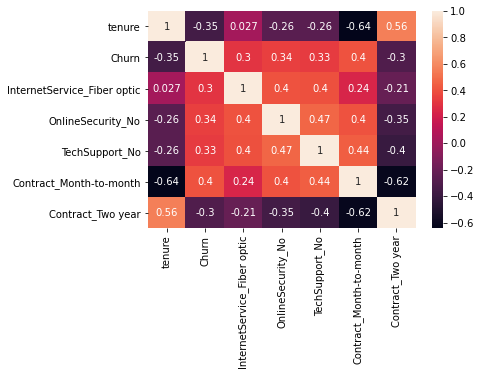

In [44]:
corr_new = new_df[corr_churn_high.index]
corr_new = corr_new.corr()
sns.heatmap(corr_new, annot= True)

### 5. Model Training

### Logistic Regression model

In [45]:
Y = new_df['Churn']
X = new_df.drop(['Churn'], axis=1)

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 1, shuffle = True)
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [47]:
predict_1 = lr.predict(X_test)

In [48]:
mse_1 = mean_squared_error(Y_test, predict_1)
mse_1

0.21202003338898165

In [49]:
rmse_1 = np.sqrt(mse_1)
rmse_1

0.46045633168518996

In [50]:
lr.score(X_test,Y_test)

0.7879799666110183

### RandomForestClassifier model

In [51]:
rn = RandomForestClassifier()
rn.fit(X_train, Y_train)

RandomForestClassifier()

In [52]:
predict_2 = rn.predict(X_test)

In [53]:
mse_2 = mean_squared_error(predict_2, Y_test)
mse_2

0.21118530884808012

In [54]:
rmse_2 = np.sqrt(mse_2)
rmse_2

0.45954902768701417

In [55]:
rn.score(X_test,Y_test)

0.7888146911519198

In [56]:
rn = RandomForestClassifier(n_estimators = 120, max_depth = 5, random_state=1)
rn.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_estimators=120, random_state=1)

In [57]:
predict_3 = rn.predict(X_test)

In [58]:
rn.score(X_test, Y_test)

0.7996661101836394

### 6. Model Satisfaction

From LinearRegression and RandomForestClassifer the model score calculated was similar 0.78. By changing the n_estimators and max_depth paramters in RandomForestClassifier the model score increased to 0.799.